In [127]:
course_codes = [
    'WRDS 150B', 'PHIL 120', 'CNPS 363', 'CNPS 364', 'FRST 303', 'GERM 433',
    'MATH 312', 'EOSC 111', 'MATH 210', 'MATH 309', 'MATH 317', 'PHIL 220A',
    'CONS 127', 'ASIA 330', 'STAT 306', 'CNPS 427', 'CNPS 433', 'MATH 308',
    'MATH 340', 'STAT 406', 'CPSC 110', 'MATH 345', 'MATH 441', 'PHYS 119',
    'COMM 101', 'CS 115', 'EMLS 129R', 'MATH 135', 'MATH 137', 'CS 116',
    'ECON 102', 'MATH 136', 'MATH 138', 'STAT 230', 'ECON 101 220 102',
    'ECON 103 220 103', 'CALC 151 640 151', 'CALC 152 640 152', 'PHYS 203 750 203',
    'PHYS 205 750 205', 'COMSCI 111 01 198 111', 'RDNG 100 01 355 099',
    'BASICCOMP 101 01 355 099', 'LINEARALG 251 01 640 251', 'BUSINESS 108 33 011 108',
    'RUFIT 1 33 011 124', 'COMM 2BC3', 'COMM 2FB3', 'COMM 2GR0B', 'COMM 2IN0',
    'COMM 2OC3'
]
# List of course titles
course_titles = [
    'Introduction to Writing and Communication', 'Introduction to Philosophy', 'Counseling Psychology I', 'Counseling Psychology II', 
    'Forest Ecology and Management', 'Advanced German Literature', 'Advanced Calculus', 'Introduction to Earth Science', 
    'Linear Algebra', 'Mathematical Analysis', 'Complex Variables', 'Ethics in Philosophy', 'Conservation and Sustainability', 
    'East Asian History', 'Introduction to Statistics', 'Advanced Counseling Skills', 'Clinical Supervision', 
    'Ordinary Differential Equations', 'Discrete Mathematics', 'Applied Statistics', 'Introduction to Computer Science', 
    'Number Theory', 'Real Analysis', 'Introductory Physics', 'Introduction to Business', 
    'English for Multilingual Speakers', 'Calculus I', 'Calculus II', 'Data Structures', 'Introduction to Economics', 
    'Algebra and Geometry', 'Calculus III', 'Introduction to Probability', 'Microeconomics', 'Macroeconomics', 
    'Calculus I for Engineers', 'Calculus II for Engineers', 'General Physics I', 'General Physics II', 
    'Introduction to Computer Programming', 'Academic Reading Skills', 'Basic Computer Skills', 'Linear Algebra for Engineers', 
    'Introduction to Business Concepts', 'Fundamentals of Physical Fitness', 'Organizational Behaviour', 
    'Financial Accounting', 'Business Analytics', 'International Business', 'Operations Management'
]

In [67]:
import re
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sentence_transformers import SentenceTransformer
from kneed import KneeLocator
from sklearn.metrics.pairwise import cosine_similarity

# Filter out strings that contain only numbers
dept_strings = [re.sub(r'\d+', '', s) for s in course_titles]
digit_strings = [''.join(re.findall(r'\d+', s)) for s in course_titles]

print(dept_strings)


['Introduction to Writing and Communication', 'Introduction to Philosophy', 'Counseling Psychology I', 'Counseling Psychology II', 'Forest Ecology and Management', 'Advanced German Literature', 'Advanced Calculus', 'Introduction to Earth Science', 'Linear Algebra', 'Mathematical Analysis', 'Complex Variables', 'Ethics in Philosophy', 'Conservation and Sustainability', 'East Asian History', 'Introduction to Statistics', 'Advanced Counseling Skills', 'Clinical Supervision', 'Ordinary Differential Equations', 'Discrete Mathematics', 'Applied Statistics', 'Introduction to Computer Science', 'Number Theory', 'Real Analysis', 'Introductory Physics', 'Introduction to Business', 'Introduction to Computer Science', 'English for Multilingual Speakers', 'Calculus I', 'Calculus II', 'Data Structures', 'Introduction to Economics', 'Algebra and Geometry', 'Calculus III', 'Introduction to Probability', 'Microeconomics', 'Macroeconomics', 'Calculus I for Engineers', 'Calculus II for Engineers', 'Gener

Optimal number of clusters: 8
                                 course_title  cluster
48                         Business Analytics        0
14                 Introduction to Statistics        0
33                Introduction to Probability        0
19                         Applied Statistics        0
37                  Calculus II for Engineers        1
32                               Calculus III        1
23                       Introductory Physics        1
36                   Calculus I for Engineers        1
9                       Mathematical Analysis        1
17            Ordinary Differential Equations        1
38                          General Physics I        1
6                           Advanced Calculus        1
39                         General Physics II        1
27                                 Calculus I        1
22                              Real Analysis        1
28                                Calculus II        1
26          English for Multilingua

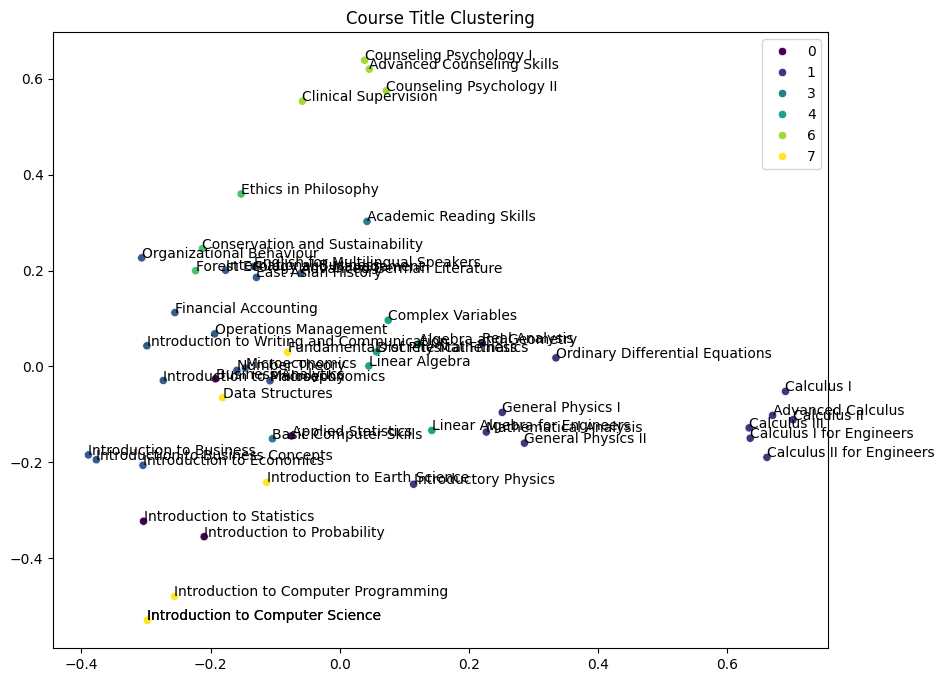

In [72]:
# Load pre-trained BERT model
# model = SentenceTransformer('all-MiniLM-L6-v2')

# Compute embeddings
embeddings = model.encode(dept_strings)

# Compute WCSS for different numbers of clusters
wcss = []
max_clusters = 15
for i in range(1, max_clusters + 1):
    kmeans = KMeans(n_clusters=i, random_state=42, n_init='auto')
    kmeans.fit(embeddings)
    wcss.append(kmeans.inertia_)

# Use the Kneedle algorithm to find the elbow point
kneedle = KneeLocator(range(1, max_clusters + 1), wcss, curve='convex', direction='decreasing')
optimal_clusters = kneedle.elbow
print(f'Optimal number of clusters: {optimal_clusters}')

# Apply clustering with the optimal number of clusters
kmeans = KMeans(n_clusters=optimal_clusters, random_state=42, n_init='auto')
clusters = kmeans.fit_predict(embeddings)

# Create a DataFrame to view the clustering results
cluster_df = pd.DataFrame({
    'course_title': course_titles,
    'cluster': clusters
})

print(cluster_df.sort_values(by='cluster'))

# Optional: Reduce dimensionality for visualization
pca = PCA(n_components=2)
reduced_embeddings = pca.fit_transform(embeddings)

# Plot the clusters
plt.figure(figsize=(10, 8))
sns.scatterplot(x=reduced_embeddings[:, 0], y=reduced_embeddings[:, 1], hue=clusters, palette='viridis')
for i, txt in enumerate(course_titles):
    plt.annotate(txt, (reduced_embeddings[i, 0], reduced_embeddings[i, 1]))
plt.title('Course Title Clustering')
plt.show()

In [123]:
from sklearn.cluster import DBSCAN

# Load pre-trained BERT model
# model = SentenceTransformer('all-MiniLM-L6-v2')

# Compute embeddings
embeddings = model.encode(dept_strings)

# Apply DBSCAN clustering
dbscan = DBSCAN(eps=0.5, min_samples=2, metric='cosine')  # You might need to adjust eps and min_samples
clusters = dbscan.fit_predict(embeddings)

# Create a DataFrame to view the clustering results
cluster_df = pd.DataFrame({
    'course_code': course_titles,
    'cluster': clusters
})

print(cluster_df.sort_values(by='cluster'))

# Optional: Reduce dimensionality for visualization
pca = PCA(n_components=2)
reduced_embeddings = pca.fit_transform(embeddings)

# Plot the clusters
plt.figure(figsize=(10, 8))
sns.scatterplot(x=reduced_embeddings[:, 0], y=reduced_embeddings[:, 1], hue=clusters, palette='viridis', legend='full')
for i, txt in enumerate(course_titles):
    plt.annotate(txt, (reduced_embeddings[i, 0], reduced_embeddings[i, 1]), fontsize=8)
plt.title('Course Code Clustering using DBSCAN')
plt.show()


ValueError: All arrays must be of the same length

                                 course_title  cluster
0   Introduction to Writing and Communication       -1
17            Ordinary Differential Equations       -1
28                            Data Structures       -1
13                         East Asian History       -1
40                    Academic Reading Skills       -1
10                          Complex Variables       -1
25          English for Multilingual Speakers       -1
44           Fundamentals of Physical Fitness       -1
46                       Financial Accounting       -1
5                  Advanced German Literature       -1
47                         Business Analytics       -1
7               Introduction to Earth Science       -1
48                     International Business       -1
4               Forest Ecology and Management        0
12            Conservation and Sustainability        0
3                    Counseling Psychology II        1
2                     Counseling Psychology I        1
15        

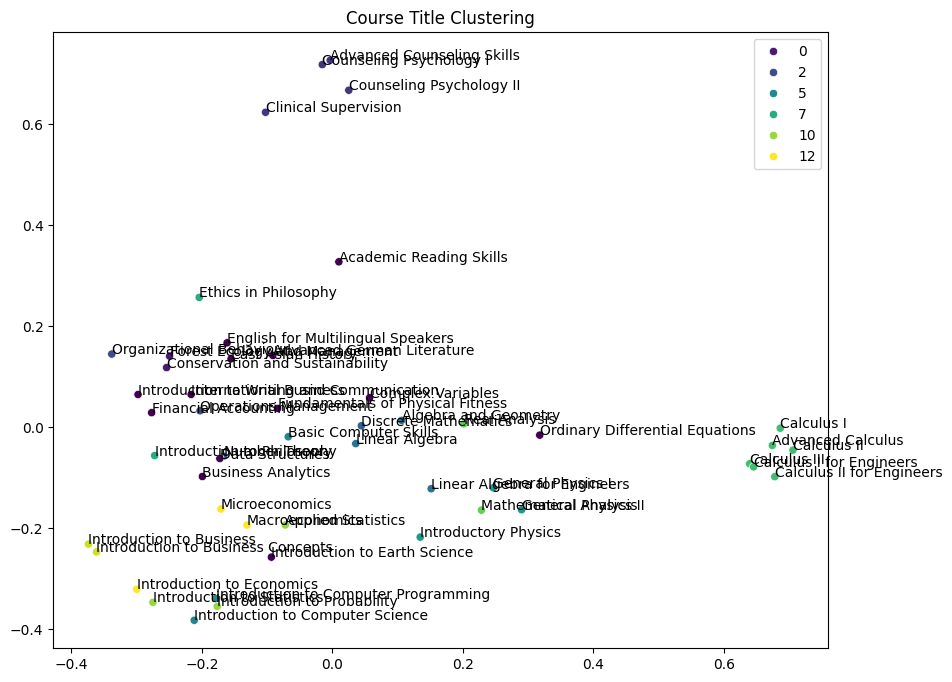

In [124]:
import hdbscan
import numpy as np


# Load pre-trained BERT model
# model = SentenceTransformer('all-MiniLM-L6-v2')
# Compute embeddings
embeddings = model.encode(course_titles)

# Compute the cosine similarity matrix
cosine_sim_matrix = cosine_similarity(embeddings)

# Convert the cosine similarity matrix to a distance matrix
cosine_dist_matrix = 1 - cosine_sim_matrix

# Ensure the distance matrix is of type double (float64)
cosine_dist_matrix = cosine_dist_matrix.astype(np.float64)

# Use HDBSCAN with the precomputed distance matrix
clusterer = hdbscan.HDBSCAN(min_cluster_size=2, min_samples=1, metric='euclidean')#,cluster_selection_epsilon = 0.5 )
clusters = clusterer.fit_predict(embeddings)

# Create a DataFrame to view the clustering results
cluster_df = pd.DataFrame({
    'course_title': course_titles,
    'cluster': clusters,
    'embedding': list(embeddings)
})

print(cluster_df[['course_title', 'cluster']].sort_values(by='cluster'))


# Optional: Reduce dimensionality for visualization
pca = PCA(n_components=2)
reduced_embeddings = pca.fit_transform(embeddings)

# Plot the clusters
plt.figure(figsize=(10, 8))
sns.scatterplot(x=reduced_embeddings[:, 0], y=reduced_embeddings[:, 1], hue=clusters, palette='viridis')
for i, txt in enumerate(course_titles):
    plt.annotate(txt, (reduced_embeddings[i, 0], reduced_embeddings[i, 1]))
plt.title('Course Title Clustering')
plt.show()

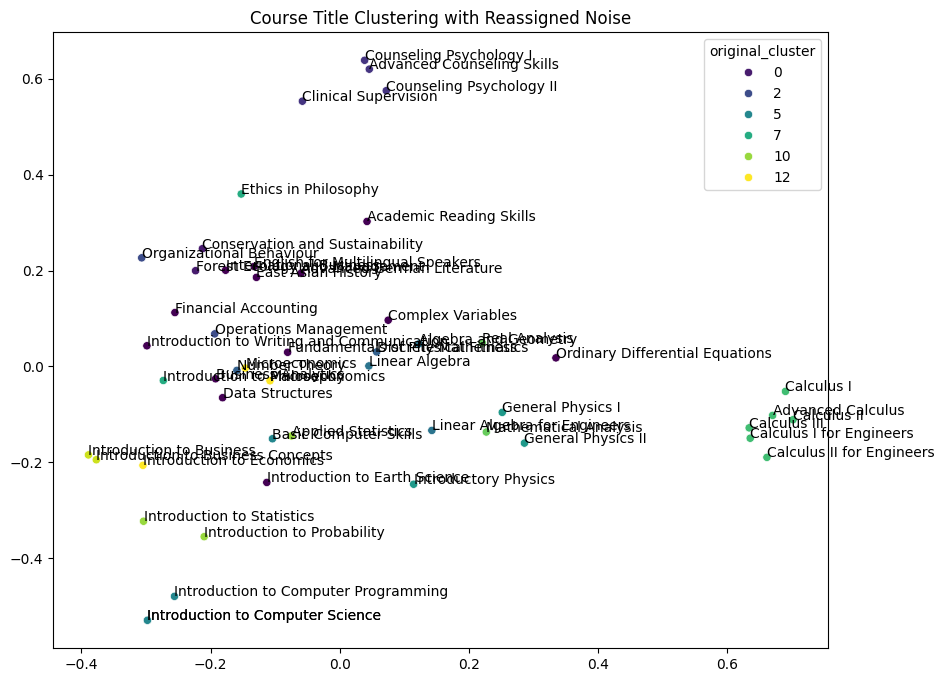

,course_title,original_cluster
0,Introduction to Writing and Communication,-1
17,Ordinary Differential Equations,-1
29,Data Structures,-1
13,East Asian History,-1
41,Academic Reading Skills,-1
10,Complex Variables,-1
26,English for Multilingual Speakers,-1
45,Fundamentals of Physical Fitness,-1
47,Financial Accounting,-1
5,Advanced German Literature,-1


In [113]:
# Compute embeddings
embeddings = model.encode(course_titles)

# Compute the cosine similarity matrix
cosine_sim_matrix = cosine_similarity(embeddings)

# Convert the cosine similarity matrix to a distance matrix
cosine_dist_matrix = 1 - cosine_sim_matrix

# Ensure the distance matrix is of type double (float64)
cosine_dist_matrix = cosine_dist_matrix.astype(np.float64)

# Initial HDBSCAN clustering
clusterer = hdbscan.HDBSCAN(min_cluster_size=2, min_samples=1, metric='precomputed')
clusterer = dbscan()
clusters = clusterer.fit_predict(cosine_dist_matrix)
# Create a DataFrame to view the clustering results
cluster_df = pd.DataFrame({
    'course_title': course_titles,
    'embedding': list(embeddings),
    'original_cluster': clusters
})

# Extract noise points
# noise_points = cluster_df[cluster_df['original_cluster'] == -1]
# non_noise_points = cluster_df[cluster_df['original_cluster'] != -1]

# # Compute centroids of existing clusters
# centroids = non_noise_points.groupby('original_cluster')['embedding'].apply(lambda x: np.mean(np.vstack(x), axis=0))

# # Compute cosine similarity between noise points and cluster centroids
# noise_embeddings = np.vstack(noise_points['embedding'])
# centroid_embeddings = np.vstack(centroids)

# similarity_matrix = cosine_similarity(noise_embeddings, centroid_embeddings)

# # Define a similarity threshold for reassignment
# similarity_threshold = 0.3

# # Initialize remapped clusters with original clusters
# cluster_df['remapped_cluster'] = cluster_df['original_cluster']

# # Reassign noise points
# for i, row in noise_points.reset_index().iterrows():
#     similarities = similarity_matrix[i]
#     max_similarity = np.max(similarities)
#     if max_similarity >= similarity_threshold:
#         best_cluster = np.argmax(similarities)
#         cluster_df.at[i, 'remapped_cluster'] = centroids.index[best_cluster]

# Optional: Reduce dimensionality for visualization
pca = PCA(n_components=2)
reduced_embeddings = pca.fit_transform(embeddings)

# Plot the clusters
plt.figure(figsize=(10, 8))
sns.scatterplot(x=reduced_embeddings[:, 0], y=reduced_embeddings[:, 1], hue=cluster_df['original_cluster'], palette='viridis')
for i, txt in enumerate(course_titles):
    plt.annotate(txt, (reduced_embeddings[i, 0], reduced_embeddings[i, 1]))
plt.title('Course Title Clustering with Reassigned Noise')
plt.show()

# Print the updated clusters with only course title and remapped cluster
cluster_df[['course_title', 'original_cluster']].sort_values(by='original_cluster').head(50)


In [129]:
# Dictionary for course titles
subject_keywords_titles = {
    'Mathematics': ['calculus', 'algebra', 'statistics', 'geometry', 'analysis'],
    'Computer Science': ['data', 'computers', 'AI', 'machine learning', 'algorithms', 'programming'],
    'History': ['history', 'civilization', 'ancient', 'modern', 'medieval'],
    'Philosophy': ['philosophy', 'ethics', 'logic', 'metaphysics'],
    'Psychology': ['psychology', 'counseling', 'behavior', 'therapy'],
    'Business': ['business', 'management', 'finance', 'marketing', 'accounting'],
    'Physics': ['physics', 'quantum', 'mechanics', 'thermodynamics'],
    'Biology': ['biology', 'genetics', 'evolution', 'ecology'],
    'Environmental Science': ['environment', 'ecology', 'sustainability', 'conservation'],
    'Economics': ['economics', 'microeconomics', 'macroeconomics', 'trade'],
    'Language and Literature': ['literature', 'writing', 'communication', 'language'],
    # Add more subjects and keywords as needed
}

# Dictionary for course codes
subject_keywords_codes = {
    'Mathematics': ['MATH', 'CALC', 'ALGEBRA', 'STAT', 'GEOM'],
    'Computer Science': ['CS', 'CPSC', 'COMP', 'INF', 'IT'],
    'History': ['HIST', 'CLAS', 'ASIA', 'EURO', 'AMST'],
    'Philosophy': ['PHIL', 'LOGIC', 'ETH'],
    'Psychology': ['PSYCH', 'PSYC', 'CNPS'],
    'Business': ['BUS', 'COMM', 'MGMT', 'FIN', 'MKT', 'ACCT'],
    'Physics': ['PHYS', 'ASTRO'],
    'Biology': ['BIOL', 'GEN', 'ECO'],
    'Environmental Science': ['ENV', 'ECOL', 'FRST'],
    'Economics': ['ECON', 'MICRO', 'MACRO'],
    'Language and Literature': ['WRDS', 'ENG', 'GERM', 'FR'],
    # Add more subjects and keywords as needed
}

from sentence_transformers import SentenceTransformer
import numpy as np

# Load pre-trained BERT model
model = SentenceTransformer('all-MiniLM-L6-v2')

# Compute embeddings for title keywords
subject_embeddings_titles = {}
for subject, keywords in subject_keywords_titles.items():
    subject_embeddings_titles[subject] = model.encode(keywords)

# Compute embeddings for code keywords
subject_embeddings_codes = {}
for subject, keywords in subject_keywords_codes.items():
    subject_embeddings_codes[subject] = model.encode(keywords)


course_embeddings = model.encode(course_codes)

# Compute embeddings for course titles and codes
course_embeddings_titles = model.encode(course_titles)
course_embeddings_codes = model.encode(course_codes)

# Function to compute the closest subject for each course
def assign_courses_to_subjects(course_embeddings, subject_embeddings):
    course_subjects = []
    for i, course_embedding in enumerate(course_embeddings):
        best_subject = None
        best_similarity = -1
        for subject, embeddings in subject_embeddings.items():
            similarity = np.mean([np.dot(course_embedding, keyword_embedding) / (np.linalg.norm(course_embedding) * np.linalg.norm(keyword_embedding)) for keyword_embedding in embeddings])
            if similarity > best_similarity:
                best_similarity = similarity
                best_subject = subject
        course_subjects.append(best_subject)
    return course_subjects

# Assign courses to subjects for titles and codes
assigned_subjects_titles = assign_courses_to_subjects(course_embeddings_titles, subject_embeddings_titles)
assigned_subjects_codes = assign_courses_to_subjects(course_embeddings_codes, subject_embeddings_codes)

# Create DataFrames to view the assignment results
assignment_df_titles = pd.DataFrame({
    'course_title': course_titles,
    'assigned_subject': assigned_subjects_titles
})

assignment_df_codes = pd.DataFrame({
    'course_code': course_codes,
    'assigned_subject': assigned_subjects_codes
})

print("Course Titles Assignment:")
print(assignment_df_titles)

print("\nCourse Codes Assignment:")
print(assignment_df_codes)


/Users/declanbracken/Development/UofT_Projects/Meng_Project/code_base/yolo_env/lib/python3.8/site-packages/huggingface_hub/file_download.py:1132: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(


Course Titles Assignment:
                                 course_title         assigned_subject
0   Introduction to Writing and Communication  Language and Literature
1                  Introduction to Philosophy               Philosophy
2                     Counseling Psychology I               Psychology
3                    Counseling Psychology II               Psychology
4               Forest Ecology and Management    Environmental Science
5                  Advanced German Literature  Language and Literature
6                           Advanced Calculus              Mathematics
7               Introduction to Earth Science    Environmental Science
8                              Linear Algebra              Mathematics
9                       Mathematical Analysis              Mathematics
10                          Complex Variables              Mathematics
11                       Ethics in Philosophy               Philosophy
12            Conservation and Sustainability    En